### Ejemplo probabilidad COVID

Supongamos que tenemos una población donde 5 de cada 1000 personas están infectadas.


Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **al menos un contagiado** en función del número de personas dado por el eje X

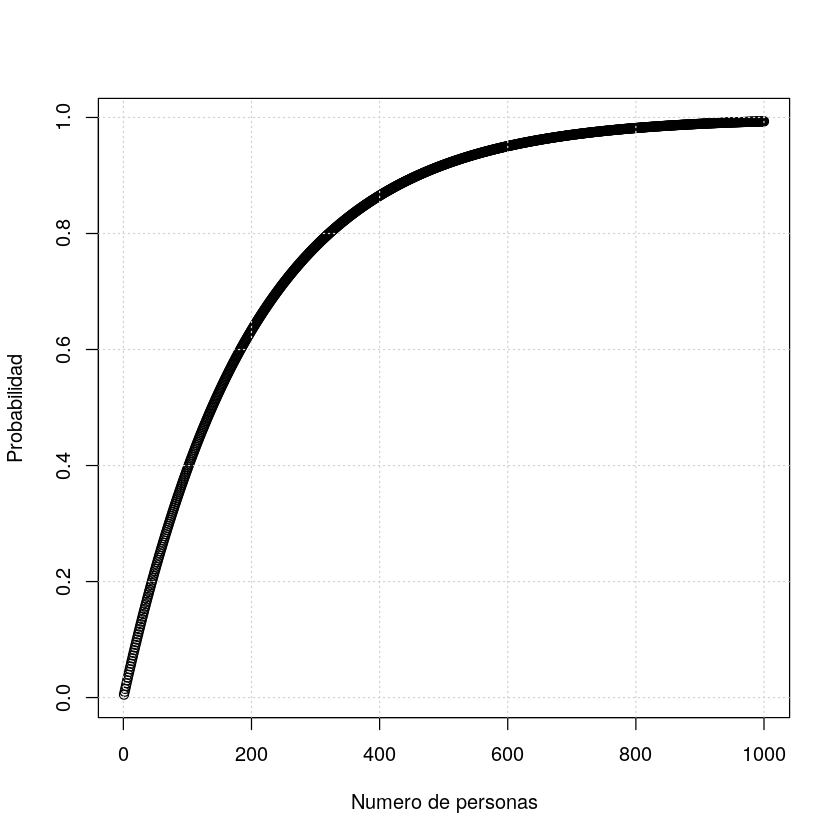

In [2]:
p <- 5/1000
x <- 1:1000

prb <- 1-dbinom(x=0,size=x, prob=p)
plot(x, prb, xlab='Numero de personas', ylab='Probabilidad')
grid()

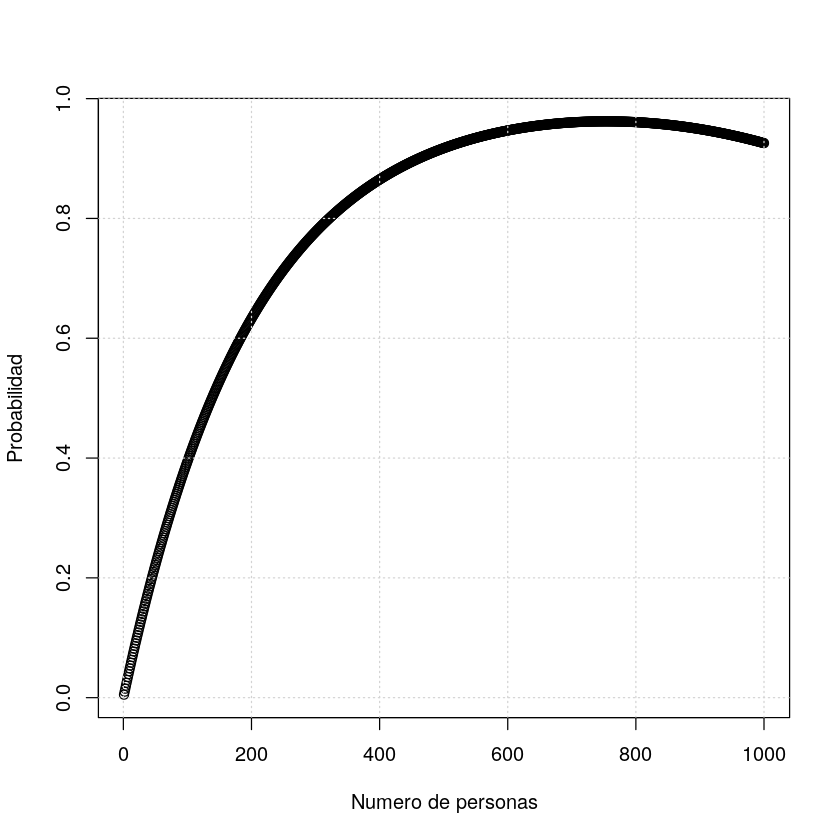

In [22]:
#Aproximación de los 8 primeros casos
prb <- dbinom(x=1,size=x, prob=p)+dbinom(x=2,size=x, prob=p)+dbinom(x=3,size=x, prob=p)+dbinom(x=4,size=x, prob=p)+dbinom(x=5,size=x, prob=p)+dbinom(x=6,size=x, prob=p)+dbinom(x=7,size=x, prob=p)+dbinom(x=8,size=x, prob=p)
plot(x, prb, xlab='Numero de personas', ylab='Probabilidad')
grid()

In [6]:
1-dbinom(x=0,size=200, prob=p)

[1] 0.6330422

In [8]:
dbinom(x=0,size=200, prob=p)+dbinom(x=1,size=200, prob=p)+dbinom(x=2,size=200, prob=p)+dbinom(x=3,size=200, prob=p)

[1] 0.9813187

In [12]:
pbinom(3, size=200, prob=p)

[1] 0.9813187

In [13]:
1-pbinom(3, size=200, prob=p)

[1] 0.01868134

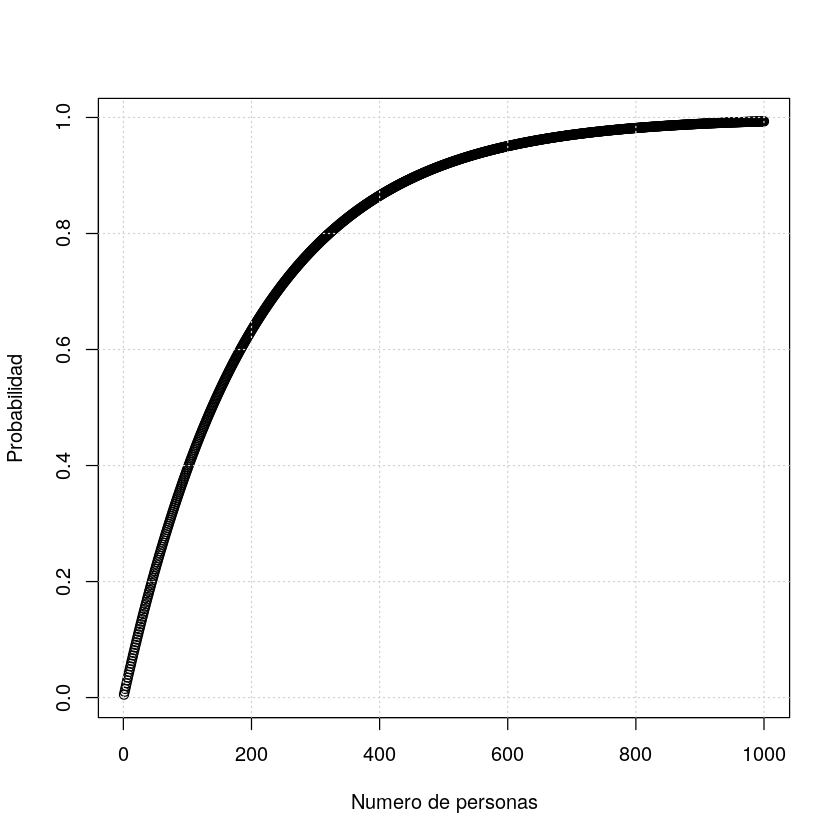

In [16]:
p <- 5/1000
x <- 1:1000

prb <- 1-pbinom(0, size=x, prob=p)
plot(x, prb, xlab='Numero de personas', ylab='Probabilidad')
grid()

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **exactamente dos contagiados** en función del número de personas dado por el eje X

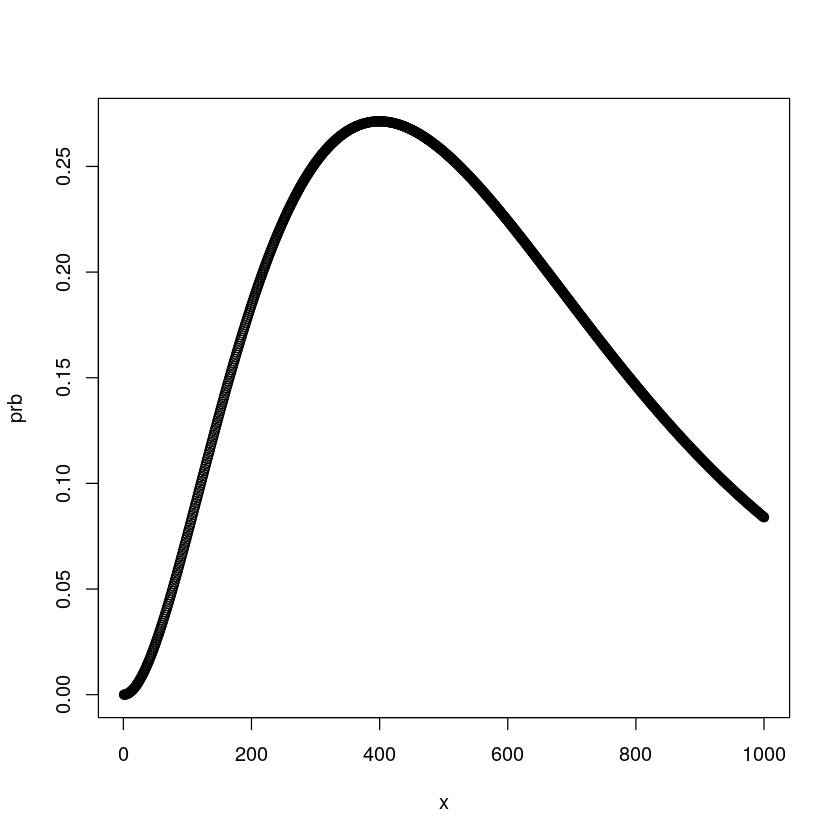

In [23]:
prb <- dbinom(x=2, size=x, prob=p)
plot(x, prb)

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **dos o más contagiados** en función del número de personas dado por el eje X

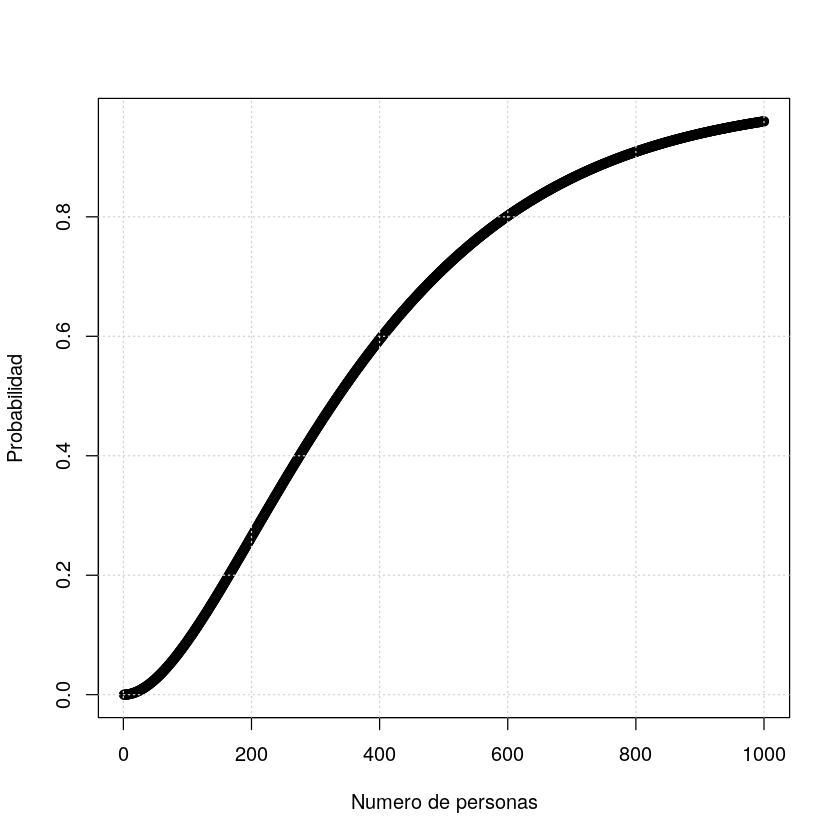

In [24]:
prb <- 1-dbinom(x=0,size=x, prob=p)-dbinom(x=1,size=x, prob=p)
plot(x, prb, xlab='Numero de personas', ylab='Probabilidad')
grid()

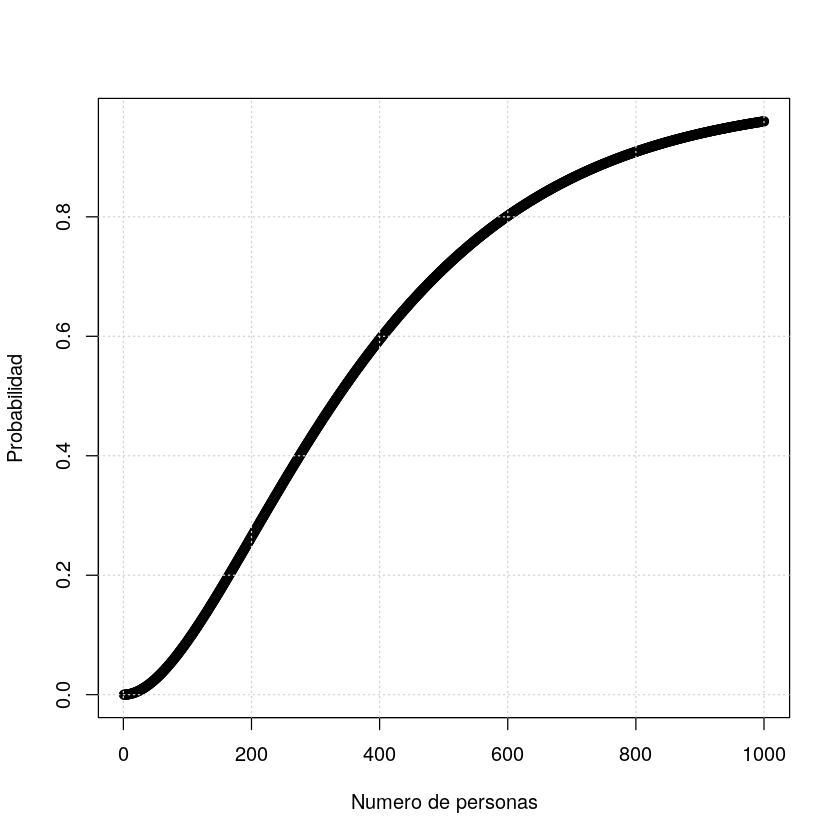

In [26]:
prb <- 1-pbinom(1, size=x, prob=p)
plot(x, prb, xlab='Numero de personas', ylab='Probabilidad')
grid()

## Peso al nacer

Leer el dataset que se encuentra en data/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
¿Sigue una distribución gaussiana?

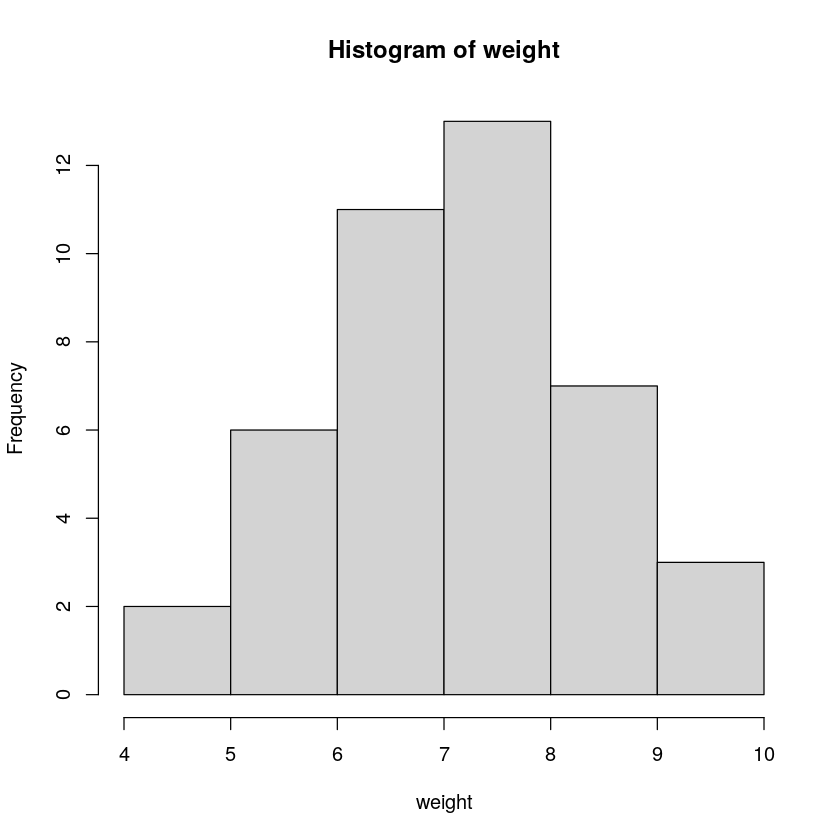

In [28]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight
hist(weight)

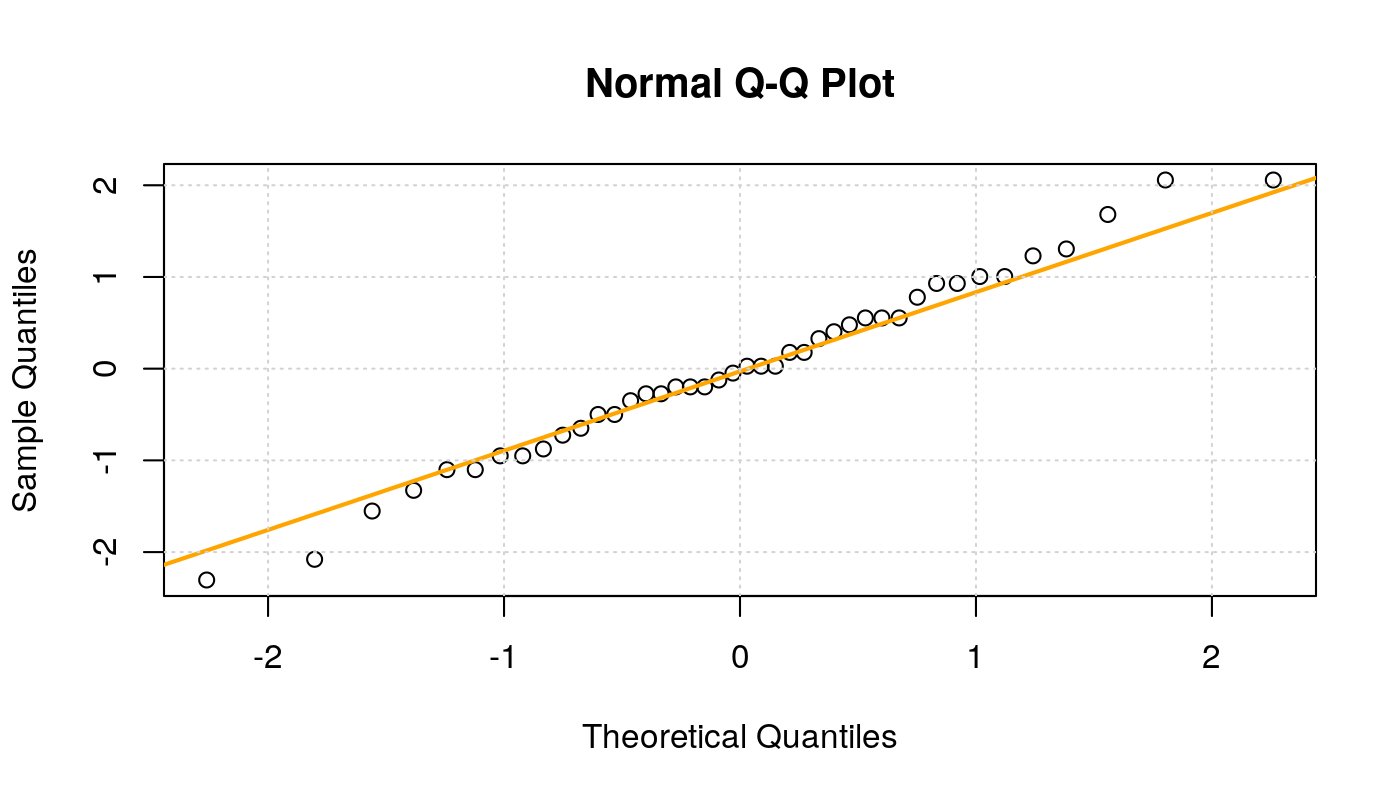

In [33]:
options(repr.plot.height=4,repr.plot.width=7, repr.plot.res = 200)

qqnorm((weight-mean(weight))/sd(weight))
qqline((weight-mean(weight))/sd(weight), col = 'orange', lwd =2)
grid()

# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [34]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))

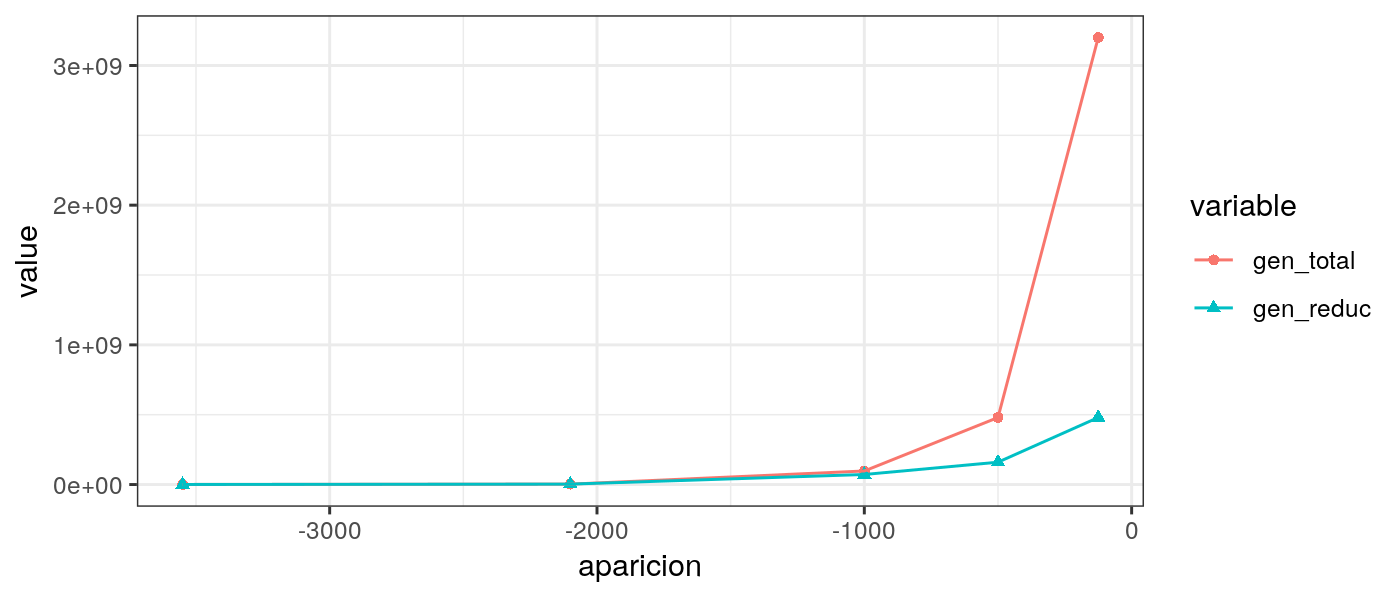

In [38]:
library(ggplot2)
library(reshape2)

options(repr.plot.height=3,repr.plot.width=7)
dfm<-melt(df,id=c("especie","aparicion"))
ggplot(data=dfm,aes(x=aparicion,y=value,color=variable))+geom_point(aes(shape=variable))+
 geom_line()+theme_bw()

especie,gen_total,gen_reduc,aparicion
<chr>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


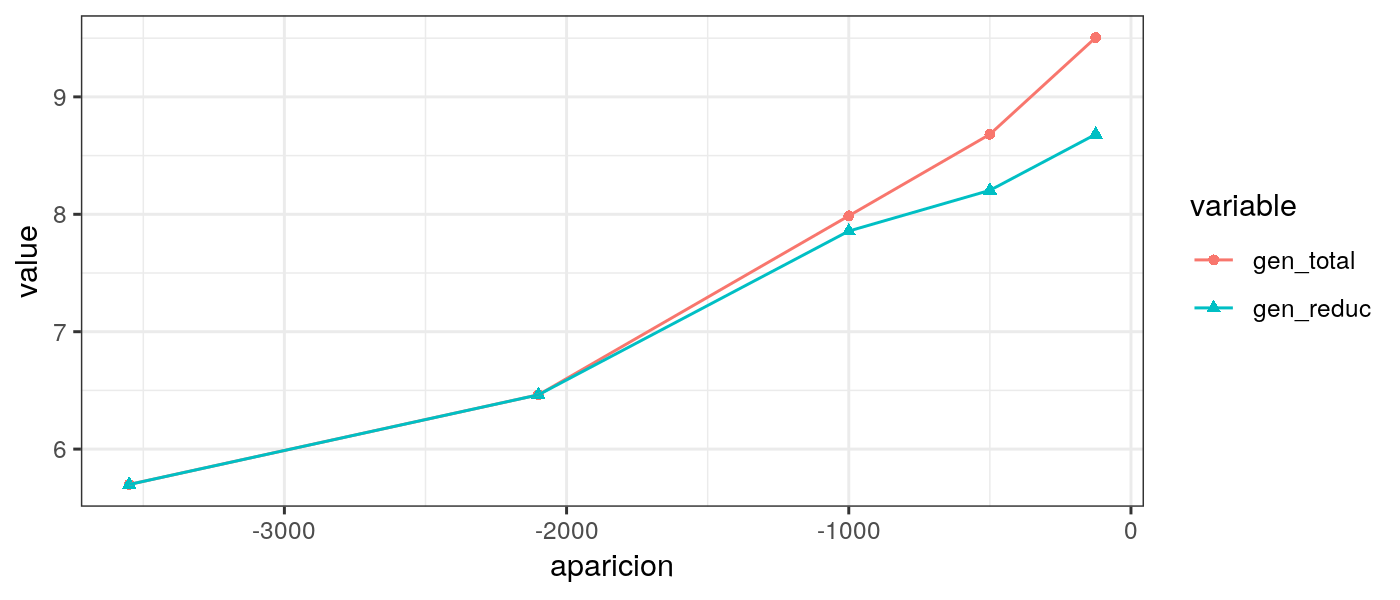

In [40]:
dflog<-df
dflog[,2:3]<- log10(dflog[,2:3])
#dflog[,4]<- -log10(-dflog[,4])
dflog

dfm<-melt(dflog,id=c("especie","aparicion"))

options(repr.plot.height=3,repr.plot.width=7)

ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+
    geom_line(aes(color=variable))+theme_bw()

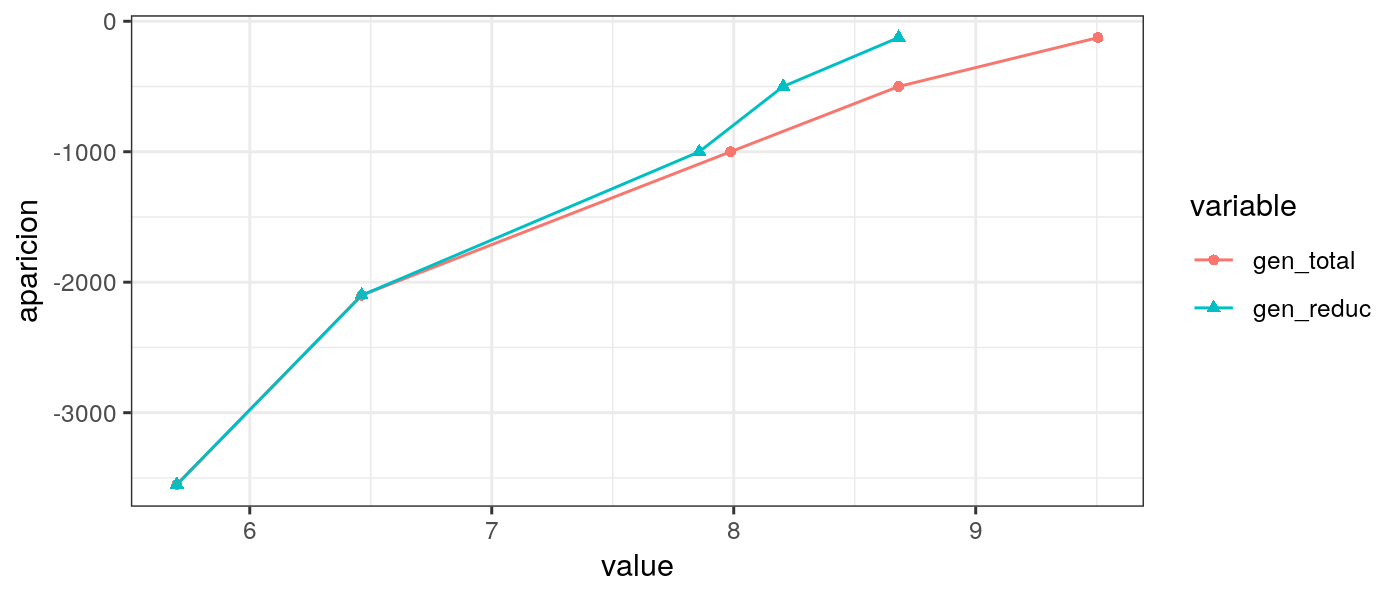

In [41]:
ggplot(data=dfm,aes(x=value,y=aparicion))+geom_point(aes(shape=variable,color=variable))+
    geom_line(aes(color=variable))+theme_bw()

In [42]:
model_total <- lm(data=dflog, formula= aparicion~gen_total)
summary(model_total)


Call:
lm(formula = aparicion ~ gen_total, data = dflog)

Residuals:
     1      2      3      4      5 
-251.2   82.5  179.9  391.1 -402.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -8049.8      926.6  -8.687  0.00321 **
gen_total      860.2      118.9   7.235  0.00545 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 372.8 on 3 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9277 
F-statistic: 52.35 on 1 and 3 DF,  p-value: 0.005446


In [54]:
confint(model_total)

,2.5 %,97.5 %
(Intercept),-10998.7966,-5100.834
gen_total,481.8064,1238.526


In [52]:
predict(model_total,data.frame(gen_total=0))

1 
-8049.815

In [48]:
model_reduc <- lm(data=dflog, formula= aparicion~gen_reduc)
summary(model_reduc)


Call:
lm(formula = aparicion ~ gen_reduc, data = dflog)

Residuals:
      1       2       3       4       5 
 -90.84   55.46  -65.64  358.45 -257.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -9519.2      789.6  -12.05  0.00123 **
gen_reduc     1092.6      105.8   10.33  0.00194 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 264.8 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


In [51]:
predict(model_reduc,data.frame(gen_reduc=0))

1 
-9519.224

In [55]:
confint(model_reduc)

,2.5 %,97.5 %
(Intercept),-12032.2415,-7006.206
gen_reduc,755.9644,1429.222


In [57]:
predict(model_reduc,data.frame(gen_reduc=3), interval = 'confidence')

,fit,lwr,upr
1,-6241.445,-7763.555,-4719.335
